## Setup

In [1]:
from UTILITY_quickstart import *  
from tabulate import tabulate


importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline2.yml")  

#New DL10 centering 
importedDefaultSettings = importedDefaultSettings | {"centerDL10" : True}

#Center sextupoles for simplicity. We're looking at BEGBC20 anyway; this just keeps the tracking happier
importedDefaultSettings = importedDefaultSettings | {
    "S1EL_xOffset" : 0.0,
    "S1EL_yOffset" : 0.0,
    "S2EL_xOffset" : 0.0,
    "S2EL_yOffset" : 0.0,
    "S2ER_xOffset" : 0.0,
    "S2ER_yOffset" : 0.0,
    "S1ER_xOffset" : 0.0,
    "S1ER_yOffset" : 0.0,
}


#Disable BC14 centering; want better agreement between single particle tracking and multi. And I think this is one discrepancy
importedDefaultSettings = importedDefaultSettings | { "centerBC14" : False }


#Low energy spread config, see "2025-04-17 Developing low energy spread through linacs case.ipynb"
#importedDefaultSettings = importedDefaultSettings | {"L1PhaseSet" : -10, "L2PhaseSet" : -7, "L3PhaseSet" : -7}




In [2]:
csrTF = True 
evalElement = "BEGBC20"   
inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"] 
bunchCount = importedDefaultSettings["bunchCount"] 
tao = initializeTao(     
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,          
    csrTF = csrTF,     
    numMacroParticles=1e4,     
    scratchPath = "/tmp",     
    randomizeFileNames = True,      
    transverseWakes = True 
)


totalNumElements = len(tao.lat_list("*", "ele.name"))

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Transverse wakes enabled!
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0
Beam created, written to /tmp/beams/activeBeamFile_261521847100542641.h5, and reinit to tao


In [3]:
# For simplicity, disable all apertures. Very nonphysical, but the single particle tracking failure is causing problems
# for eleII in range(totalNumElements):
#     try:
#         tao.cmd(f"set ele {eleII} APERTURE_AT = NO_APERTURE")
#     except:
#         pass

In [4]:
trackBeam(tao, 
          trackEnd = "L0BFEND", 
          verbose = True
         ) 
PInit = getBeamAtElement(tao, "L0AFEND")

artificialFactor = 1.3 
#artificialFactor = 1.0 
PInit.x = artificialFactor * PInit.x 
PInit.px = artificialFactor * PInit.px 
PInit.y = artificialFactor * PInit.y 
PInit.py = artificialFactor * PInit.py  

makeBeamActiveBeamFile(PInit, tao = tao)

Loaded /tmp/beams/activeBeamFile_261521847100542641.h5
Set track_start = L0AFEND, track_end = L0BFEND
Tracking!
trackBeam() exiting


In [5]:
# tao.lat_list("Q*", "ele.name", flags="-no_slaves") 
# Manually pared list of only "normal" quads in L1, L2, and L3
linacQuads = [
    'QM10771', 'QM10781', 'QA11132', 'Q11201', 'QA11265', 'Q11301', 
    'QM11393', 'Q11401', 'Q11501', 'Q11601', 'Q11701', 'Q11801', 'Q11901', 'Q12201', 'Q12301', 'Q12401', 'Q12501', 'Q12601', 'Q12701', 'Q12801', 'Q12901', 'Q13201', 'Q13301', 'Q13401', 'Q13501', 'Q13601', 'Q13701', 'Q13801', 'Q13901', 'Q14201', 'Q14301', 'Q14401', 'Q14501', 'Q14601', 'Q14701', 'QM14715',
    'QM14891', 'Q14901', 'Q15201', 'Q15301', 'Q15401', 'Q15501', 'Q15601', 'Q15701', 'Q15801', 'Q15901', 'Q16201', 'Q16301', 'Q16401', 'Q16501', 'Q16601', 'Q16701', 'Q16801', 'Q16901', 'Q17201', 'Q17301', 'Q17401', 'Q17501', 'Q17601', 'Q17701', 'Q17801', 'Q17901', 'Q18201', 'Q18301', 'Q18401', 'Q18501', 'Q18601', 'Q18701', 'Q18801', 'Q18901', 'Q19201', 'Q19301', 'Q19401', 'Q19501', 'Q19601', 'Q19701', 'Q19801', 'Q19851', 'Q19871'
]

#quadsToPerturb = linacQuads

#To accommodate 2014 BBA data, pick subset from z = 1100 to 1800
quadsToPerturb = [
    'Q11801', 'Q11901', 'Q12201', 'Q12301', 'Q12401', 'Q12501', 'Q12601', 'Q12701', 'Q12801', 'Q12901', 'Q13201', 'Q13301', 'Q13401', 'Q13501', 'Q13601', 'Q13701', 'Q13801', 'Q13901', 'Q14201', 'Q14301', 'Q14401', 'Q14501', 'Q14601', 'Q14701', 'QM14715',
    'QM14891', 'Q14901', 'Q15201', 'Q15301', 'Q15401', 'Q15501', 'Q15601', 'Q15701', 'Q15801', 'Q15901', 'Q16201', 'Q16301', 'Q16401', 'Q16501', 'Q16601', 'Q16701', 'Q16801', 'Q16901', 'Q17201', 'Q17301', 'Q17401', 'Q17501', 'Q17601', 'Q17701', 'Q17801', 'Q17901', 'Q18201', 'Q18301', 'Q18401', 'Q18501', 'Q18601', 'Q18701', 'Q18801', 'Q18901', 'Q19201', 'Q19301', 'Q19401', 'Q19501', 'Q19601', 'Q19701'
]

In [6]:
import json

# quadZValues = { ele : tao.ele_floor(ele)["Actual"][2] for ele in quadsToPerturb }

# with open("./quadZValues.json", "w") as f:
#     json.dump(quadZValues, f, indent=2)

#Generated with "2025-05-12 Processing real BBA data from 2014.nb"
#These are in [mm]!
with open('pinkCurveXOffsets.json', 'r') as file:
    pinkCurveXOffsets = json.load(file)

with open('pinkCurveYOffsets.json', 'r') as file:
    pinkCurveYOffsets = json.load(file)

# print(pinkCurveXOffsets)
# print(pinkCurveYOffsets)

In [7]:
#tao.lat_list("K*", "ele.name", flags="-no_slaves")
# Manually pared from above
linacsToPerturb = ['K11_4A', 'K11_4B', 'K11_4C', 'K11_4D', 'K11_5A', 'K11_5B', 'K11_5C', 'K11_5D', 'K11_6A', 'K11_6B', 'K11_6C', 'K11_6D', 'K11_7A', 'K11_7B', 'K11_7C', 'K11_7D', 'K11_8A', 'K11_8B', 'K11_8C', 'K11_8D', 'K12_1A', 'K12_1B', 'K12_1C', 'K12_1D', 'K12_2A', 'K12_2B', 'K12_2C', 'K12_2D', 'K12_3A', 'K12_3B', 'K12_3C', 'K12_3D', 'K12_4A', 'K12_4B', 'K12_4C', 'K12_4D', 'K12_5A', 'K12_5B', 'K12_5C', 'K12_5D', 'K12_6A', 'K12_6B', 'K12_6C', 'K12_6D', 'K12_7A', 'K12_7B', 'K12_7C', 'K12_7D', 'K12_8A', 'K12_8B', 'K12_8C', 'K12_8D', 'K13_1A', 'K13_1B', 'K13_1C', 'K13_1D', 'K13_2A', 'K13_2B', 'K13_2C', 'K13_2D', 'K13_3A', 'K13_3B', 'K13_3C', 'K13_3D', 'K13_4A', 'K13_4B', 'K13_4C', 'K13_4D', 'K13_5A', 'K13_5B', 'K13_5C', 'K13_5D', 'K13_6A', 'K13_6B', 'K13_6C', 'K13_6D', 'K13_7A', 'K13_7B', 'K13_7C', 'K13_7D', 'K13_8A', 'K13_8B', 'K13_8C', 'K13_8D', 'K14_1A', 'K14_1B', 'K14_1C', 'K14_1D', 'K14_2A', 'K14_2B', 'K14_2C', 'K14_2D', 'K14_3A', 'K14_3B', 'K14_3C', 'K14_3D', 'K14_4A', 'K14_4B', 'K14_4C', 'K14_4D', 'K14_5A', 'K14_5B', 'K14_5C', 'K14_5D', 'K14_6A', 'K14_6B', 'K14_6C', 'K14_6D', 'K15_1A', 'K15_1B', 'K15_1C', 'K15_1D', 'K15_2A', 'K15_2B', 'K15_2C', 'K15_3A', 'K15_3B', 'K15_3C', 'K15_3D', 'K15_4A', 'K15_4B', 'K15_4C', 'K15_4D', 'K15_5A', 'K15_5B', 'K15_5C', 'K15_5D', 'K15_6A', 'K15_6B', 'K15_6C', 'K15_6D', 'K15_7A', 'K15_7B', 'K15_7C', 'K15_7D', 'K15_8A', 'K15_8B', 'K15_8C', 'K15_8D', 'K16_1A', 'K16_1B', 'K16_1C', 'K16_1D', 'K16_2A', 'K16_2B', 'K16_2C', 'K16_2D', 'K16_3A', 'K16_3B', 'K16_3C', 'K16_3D', 'K16_4A', 'K16_4B', 'K16_4C', 'K16_4D', 'K16_5A', 'K16_5B', 'K16_5C', 'K16_5D', 'K16_6A', 'K16_6B', 'K16_6C', 'K16_6D', 'K16_7A', 'K16_7B', 'K16_7C', 'K16_7D', 'K16_8A', 'K16_8B', 'K16_8C', 'K16_8D', 'K17_1A', 'K17_1B', 'K17_1C', 'K17_1D', 'K17_2A', 'K17_2B', 'K17_2C', 'K17_2D', 'K17_3A', 'K17_3B', 'K17_3C', 'K17_3D', 'K17_4A', 'K17_4B', 'K17_4C', 'K17_4D', 'K17_5A', 'K17_5B', 'K17_5C', 'K17_5D', 'K17_6A', 'K17_6B', 'K17_6C', 'K17_6D', 'K17_7A', 'K17_7B', 'K17_7C', 'K17_7D', 'K17_8A', 'K17_8B', 'K17_8C', 'K17_8D', 'K18_1A', 'K18_1B', 'K18_1C', 'K18_1D', 'K18_2A', 'K18_2B', 'K18_2C', 'K18_2D', 'K18_3A', 'K18_3B', 'K18_3C', 'K18_3D', 'K18_4A', 'K18_4B', 'K18_4C', 'K18_4D', 'K18_5A', 'K18_5B', 'K18_5C', 'K18_5D', 'K18_6A', 'K18_6B', 'K18_6C', 'K18_6D', 'K18_7A', 'K18_7B', 'K18_7C', 'K18_7D', 'K18_8A', 'K18_8B', 'K18_8C', 'K18_8D', 'K19_1A', 'K19_1B', 'K19_1C', 'K19_1D', 'K19_2A', 'K19_2B', 'K19_2C', 'K19_2D', 'K19_3A', 'K19_3B', 'K19_3C', 'K19_3D', 'K19_4A', 'K19_4B', 'K19_4C', 'K19_4D', 'K19_5A', 'K19_5B', 'K19_5C', 'K19_5D', 'K19_6A', 'K19_6B', 'K19_6C', 'K19_6D', 'K19_8A1', 'K19_8A2', 'K19_8A3']

## Baseline

In [8]:
setLattice(tao, **importedDefaultSettings)

trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_261521847100542641.h5
Set track_start = L0AFEND, track_end = BEGBC20
Set track_end = ENDDL10
Tracking!
Beam centered at ENDDL10 written to /tmp/beams/patchBeamFile_261521847100542641.h5
Loaded /tmp/beams/patchBeamFile_261521847100542641.h5
Set track_start = ENDDL10, track_end = BEGBC20
Tracking!
trackBeam() exiting


In [9]:
activeData = {}
for activeEle in  [ "PR10571", "WS12214", "BEGBC14_1", "ENDBC14_2", "BEGBC20" ]:
    # print(activeEle)
    # print(f"""{getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6:.2f}, {getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6:.2f}""")
    # print()
    activeData[f"{activeEle}_x"] = getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6
    activeData[f"{activeEle}_y"] = getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6

printableData = { key : f"""{activeData[key]:.2f}""" for key in activeData.keys() }

print(tabulate([
    ["PR10571",                  printableData["PR10571_x"], printableData["PR10571_y"]], 
    ["WS12214",                  printableData["WS12214_x"], printableData["WS12214_y"]],
    ["BEGBC14",                  printableData["BEGBC14_1_x"], printableData["BEGBC14_1_y"]],
    ["ENDBC14",                  printableData["ENDBC14_2_x"], printableData["ENDBC14_2_y"]],
    ["BEGBC20\n(L3 wire proxy)", printableData["BEGBC20_x"], printableData["BEGBC20_y"]]
], 
["90% RMS\nemittance (not\nSI90!) [um-rad]", "\n     X     ", "\n     Y     "], 
tablefmt="grid"))

+-------------------+---------------+---------------+
| 90% RMS           |               |               |
| emittance (not    |        X      |        Y      |
| SI90!) [um-rad]   |               |               |
+===================+===============+===============+
| PR10571           |          3.91 |          2.86 |
+-------------------+---------------+---------------+
| WS12214           |          4.44 |          2.73 |
+-------------------+---------------+---------------+
| BEGBC14           |          5.2  |          2.71 |
+-------------------+---------------+---------------+
| ENDBC14           |          6.08 |          2.7  |
+-------------------+---------------+---------------+
| BEGBC20           |          6.5  |          4.11 |
| (L3 wire proxy)   |               |               |
+-------------------+---------------+---------------+


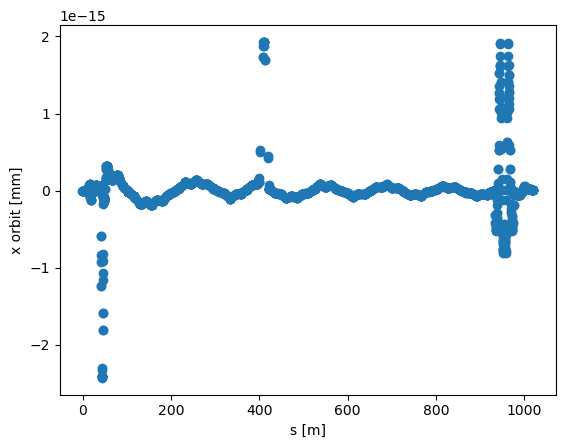

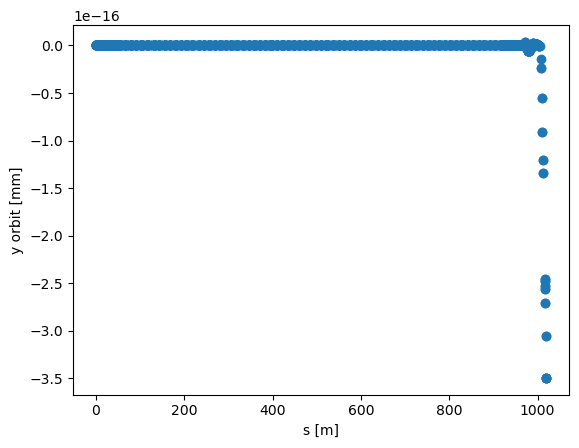

In [10]:
fig, ax = plt.subplots()
ax.scatter(
    [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
    [ tao.ele_orbit(eleII)["x"] for eleII in range(totalNumElements) ]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("x orbit [mm]")
plt.show()


fig, ax = plt.subplots()
ax.scatter(
    [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
    [ tao.ele_orbit(eleII)["y"] for eleII in range(totalNumElements) ]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("y orbit [mm]")
plt.show()

## Steering optimizer functions

From "2025-05-12 Developing full machine aligner.ipynb"

In [11]:
from scipy.optimize import minimize



combinedElementData = [
    {
        "eleII" : eleII,
        "name" : tao.ele_head(eleII)["name"],
        "key" : tao.ele_head(eleII)["key"],
        "s" : tao.ele_head(eleII)["s"]
    }
    for eleII in range(totalNumElements) 
]

#Keep only elements after L0AFEND
combinedElementData = [ele for ele in combinedElementData if ele["s"] > 4.1274477]

allHKickerNames = [ele["name"] for ele in combinedElementData if ele["key"] == "HKicker"]
allVKickerNames = [ele["name"] for ele in combinedElementData if ele["key"] == "VKicker"]

#Manually picking a list of elements that seem like BPMs. Fast and dirty, DNT
#[ele["name"] for ele in combinedElementData if ele["key"] == "Monitor"]
#allBPMNames = ['BPM10371', 'BPM10425', 'BPM10511', 'BPM10525',  'BPM10581', 'BPM10631', 'BPM10651', 'BPM10731', 'BPM10771', 'BPM10781', 'BPM11132', 'BPM11201', 'BPM11265', 'BPM11301', 'BPM11312', 'BPM11333', 'BPM11358', 'BPM11362', 'BPM11393', 'BPM11401', 'BPM11501', 'BPM11601', 'BPM11701', 'BPM11801', 'BPM11901', 'BPM12201', 'BPM12301', 'BPM12401', 'BPM12501', 'BPM12601', 'BPM12701', 'BPM12801', 'BPM12901', 'BPM13201', 'BPM13301', 'BPM13401', 'BPM13501', 'BPM13601', 'BPM13701', 'BPM13801', 'BPM13901', 'BPM14201', 'BPM14301', 'BPM14401', 'BPM14501', 'BPM14601', 'BPM14701', 'BPM14715', 'BPM14801', 'BPM14891', 'BPM14901', 'BPM15201', 'BPM15301', 'BPM15401', 'BPM15501', 'BPM15601', 'BPM15701', 'BPM15801', 'BPM15901', 'BPM16201', 'BPM16301', 'BPM16401', 'BPM16501', 'BPM16601', 'BPM16701', 'BPM16801', 'BPM16901', 'BPM17201', 'BPM17301', 'BPM17401', 'BPM17501', 'BPM17601', 'BPM17701', 'BPM17801', 'BPM17901', 'BPM18201', 'BPM18301', 'BPM18401', 'BPM18501', 'BPM18601', 'BPM18701', 'BPM18801', 'BPM18901', 'BL18900', 'BPM19201', 'BPM19301', 'BPM19401', 'BPM19801', 'BPM19851', 'BPM19871', 'M1E', 'M3E', 'MS2EL', 'M4E', 'M5E', 'M6E', 'M7E', 'M8E', 'MS2ER', 'M9E', 'M11E', 'M1FF', 'M2FF', 'M3FF', 'M4FF', 'M5FF', 'M0EX', 'M1EX', 'M2EX', 'M3EX']

#For this notebook only, steer to centers of quads instead of BPMs
#BEWARE!!! Horrible misnomer!!!
allBPMNames = quadsToPerturb




######################################
#Optional: Limit kickers and BPMs by s
######################################

optimizerBPMSMin = 100
optimizerBPMSMax = 905
optimizerKickerSMin = optimizerBPMSMin - 20 #Go a bit upstream from first BPM considered
optimizerKickerSMax = optimizerBPMSMax


allBPMNames     = [ ele for ele in allBPMNames     if optimizerBPMSMin    < tao.ele_head(ele)["s"] < optimizerBPMSMax   ]
allHKickerNames = [ ele for ele in allHKickerNames if optimizerKickerSMin < tao.ele_head(ele)["s"] < optimizerKickerSMax]
allVKickerNames = [ ele for ele in allVKickerNames if optimizerKickerSMin < tao.ele_head(ele)["s"] < optimizerKickerSMax]




selectedMarkerDicts     = [ eleDict for eleDict in combinedElementData if eleDict["key"] == "Marker"]
selectedMarkerDicts     = [ eleDict for eleDict in selectedMarkerDicts if optimizerBPMSMin    < tao.ele_head(eleDict["eleII"])["s"] < optimizerBPMSMax   ]


In [12]:
def xSetter(tao, params):
    #Prevent recalculation until changes are made
    tao.cmd("set global lattice_calc_on = F")
    
    for eleII in range(len(allHKickerNames)):
        setKickerkG(tao, allHKickerNames[eleII], params[eleII])
    
    #Reenable lattice calculations
    tao.cmd("set global lattice_calc_on = T")

def xObjective(params, tao):
    
    try:
        xSetter(tao, params)
    
    except: #If Bmad doesn't like the proposed solution, don't crash, give a bad number
        return 1e20


    orbitError = np.sqrt( np.mean( np.array([ tao.ele_orbit(ele)["x"] - (tao.ele_floor(ele)["Actual"][0] - tao.ele_floor(ele)["Reference"][0]) for ele in allBPMNames ]) ** 2 ) )

    
    #Optionally give a very slight preference to solutions that don't move the magnets very much
    moveError = 1e-6 * np.sum( (params) ** 2 ) 

    
    #print(orbitError, moveError, orbitError + moveError )
    
    return orbitError + moveError

def xSolver(tao):

    bounds = [ (-0.1, 0.1) for ele in allHKickerNames ] 
    initialGuess = [ 0 for ele in allHKickerNames ] 

    #Yes, I know there are far better ways to do this. No, I don't care.
    result = minimize(
        xObjective, 
        initialGuess, 
        #method='Nelder-Mead',
        method = "L-BFGS-B",
        bounds = bounds,
        args = (tao,)
    )

    
    return result

In [13]:
def ySetter(tao, params):
    #Prevent recalculation until changes are made
    tao.cmd("set global lattice_calc_on = F")
    
    for eleII in range(len(allVKickerNames)):
        setKickerkG(tao, allVKickerNames[eleII], params[eleII])
    
    #Reenable lattice calculations
    tao.cmd("set global lattice_calc_on = T")

def yObjective(params, tao):
    
    try:
        ySetter(tao, params)
    
    except: #If Bmad doesn't like the proposed solution, don't crash, give a bad number
        return 1e20


    orbitError = np.sqrt( np.mean( np.array([ tao.ele_orbit(ele)["y"] - (tao.ele_floor(ele)["Actual"][1] - tao.ele_floor(ele)["Reference"][1]) for ele in allBPMNames ]) ** 2 ) )

    #Optionally give a very slight preference to solutions that don't move the magnets very much
    moveError = 1e-6 * np.sum( (params) ** 2 ) 

    
    #print(orbitError, moveError, orbitError + moveError )
    
    return orbitError + moveError

def ySolver(tao):

    bounds = [ (-0.1, 0.1) for ele in allVKickerNames ] 
    initialGuess = [ 0 for ele in allVKickerNames ] 

    #Yes, I know there are far better ways to do this. No, I don't care.
    result = minimize(
        yObjective, 
        initialGuess, 
        #method='Nelder-Mead',
        method = "L-BFGS-B",
        bounds = bounds,
        args = (tao,)
    )

    
    return result

## Pink curve error

In [14]:
quadsToPerturbSValues = [ tao.ele_head(ele)["s"] for ele in quadsToPerturb ] 

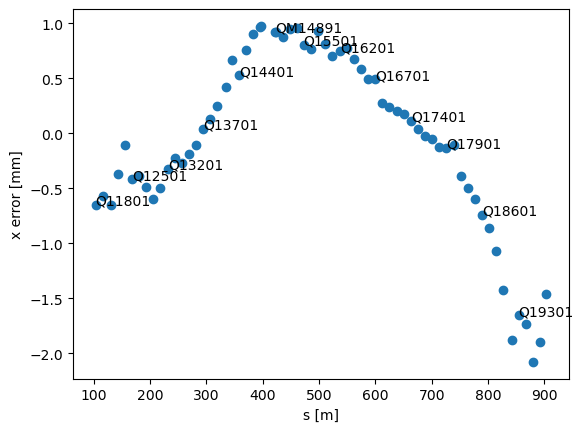

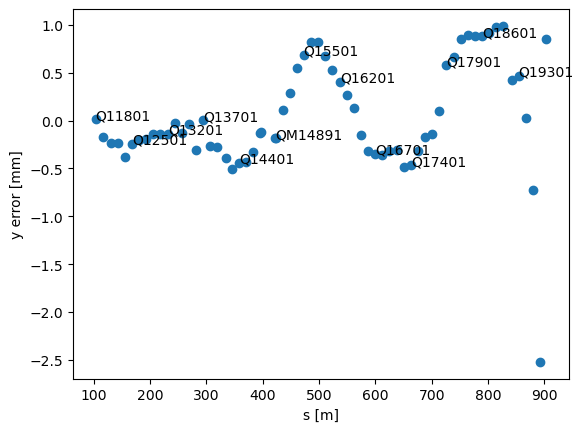

In [15]:
errorWavelength = 1000
errorAmplitude = 0.001
errorPhase = 3.1415 

quadPerturbValues = [ 1e-3 * pinkCurveXOffsets[ele] for ele in quadsToPerturb]



fig, ax = plt.subplots()
ax.scatter(quadsToPerturbSValues, 1e3 * np.array(quadPerturbValues) )

for i, txt in enumerate(quadsToPerturb):
    if i % 5 == 0:
        ax.annotate(txt, (quadsToPerturbSValues[i], (1e3 * np.array(quadPerturbValues))[i]))

ax.set_xlabel("s [m]")
ax.set_ylabel("x error [mm]")

plt.show()









quadPerturbValues = [ 1e-3 * pinkCurveYOffsets[ele] for ele in quadsToPerturb]

fig, ax = plt.subplots()
ax.scatter(quadsToPerturbSValues, 1e3 * np.array(quadPerturbValues) )

for i, txt in enumerate(quadsToPerturb):
    if i % 5 == 0:
        ax.annotate(txt, (quadsToPerturbSValues[i], (1e3 * np.array(quadPerturbValues))[i]))

ax.set_xlabel("s [m]")
ax.set_ylabel("y error [mm]")

plt.show()

In [16]:
offsetMult = 1

#Prevent recalculation until changes are made
tao.cmd("set global lattice_calc_on = F")

for ele in pinkCurveXOffsets.keys():
    #print(f"set ele {ele} X_OFFSET = {offsetMult * 1e-3 * pinkCurveXOffsets[ele]}")
    tao.cmd(f"set ele {ele} X_OFFSET = {offsetMult * 1e-3 * pinkCurveXOffsets[ele]}")

for ele in pinkCurveYOffsets.keys():
    #print(f"set ele {ele} Y_OFFSET = {offsetMult * 1e-3 * pinkCurveYOffsets[ele]}")
    tao.cmd(f"set ele {ele} Y_OFFSET = {offsetMult * 1e-3 * pinkCurveYOffsets[ele]}")

#Prevent recalculation until changes are made
tao.cmd("set global lattice_calc_on = T")

['tao_single_track: particle lost in single particle tracking at branch>>element 0>>1333: S1EL#2  [s =   943.41]']

In [17]:
setLattice(tao, **importedDefaultSettings)

trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_261521847100542641.h5
Set track_start = L0AFEND, track_end = BEGBC20
Set track_end = ENDDL10
Tracking!
Beam centered at ENDDL10 written to /tmp/beams/patchBeamFile_261521847100542641.h5
Loaded /tmp/beams/patchBeamFile_261521847100542641.h5
Set track_start = ENDDL10, track_end = BEGBC20
Tracking!
trackBeam() exiting


In [18]:
activeData = {}
for activeEle in  [ "PR10571", "WS12214", "BEGBC14_1", "ENDBC14_2", "BEGBC20" ]:
    # print(activeEle)
    # print(f"""{getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6:.2f}, {getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6:.2f}""")
    # print()
    activeData[f"{activeEle}_x"] = getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6
    activeData[f"{activeEle}_y"] = getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6

printableData = { key : f"""{activeData[key]:.2f}""" for key in activeData.keys() }
printableData

{'PR10571_x': '3.90',
 'PR10571_y': '2.86',
 'WS12214_x': '15.96',
 'WS12214_y': '8.89',
 'BEGBC14_1_x': '40.43',
 'BEGBC14_1_y': '14.42',
 'ENDBC14_2_x': '22.31',
 'ENDBC14_2_y': '13.01',
 'BEGBC20_x': '20.34',
 'BEGBC20_y': '14.99'}

In [19]:
print(tabulate([
    ["PR10571",                  printableData["PR10571_x"], printableData["PR10571_y"]], 
    ["WS12214",                  printableData["WS12214_x"], printableData["WS12214_y"]],
    ["BEGBC14",                  printableData["BEGBC14_1_x"], printableData["BEGBC14_1_y"]],
    ["ENDBC14",                  printableData["ENDBC14_2_x"], printableData["ENDBC14_2_y"]],
    ["BEGBC20\n(L3 wire proxy)", printableData["BEGBC20_x"], printableData["BEGBC20_y"]]
], 
["90% RMS\nemittance (not\nSI90!) [um-rad]", "\n     X     ", "\n     Y     "], 
tablefmt="grid"))

+-------------------+---------------+---------------+
| 90% RMS           |               |               |
| emittance (not    |        X      |        Y      |
| SI90!) [um-rad]   |               |               |
+===================+===============+===============+
| PR10571           |          3.9  |          2.86 |
+-------------------+---------------+---------------+
| WS12214           |         15.96 |          8.89 |
+-------------------+---------------+---------------+
| BEGBC14           |         40.43 |         14.42 |
+-------------------+---------------+---------------+
| ENDBC14           |         22.31 |         13.01 |
+-------------------+---------------+---------------+
| BEGBC20           |         20.34 |         14.99 |
| (L3 wire proxy)   |               |               |
+-------------------+---------------+---------------+


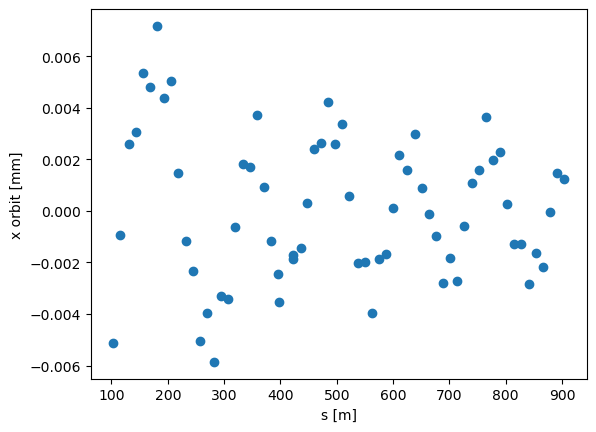

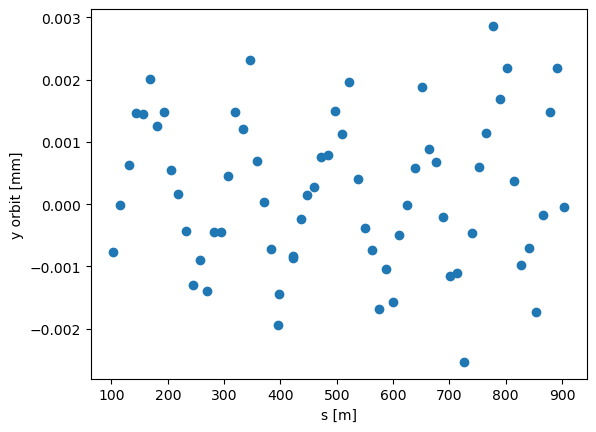

In [20]:
fig, ax = plt.subplots()
# ax.scatter(
#     [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
#     [ tao.ele_orbit(eleII)["x"] for eleII in range(totalNumElements) ]
# )
ax.scatter(
    [ tao.ele_head(ele)["s"] for ele in allBPMNames ],
    #[ tao.ele_orbit(ele)["x"] for ele in allBPMNames ]
    [tao.ele_orbit(ele)["x"] - (tao.ele_floor(ele)["Actual"][0] - tao.ele_floor(ele)["Reference"][0]) for ele in allBPMNames]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("x orbit [mm]")
plt.show()


fig, ax = plt.subplots()
# ax.scatter(
#     [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
#     [ tao.ele_orbit(eleII)["y"] for eleII in range(totalNumElements) ]
# )
ax.scatter(
    [ tao.ele_head(ele)["s"] for ele in allBPMNames ],
    #[ tao.ele_orbit(ele)["y"] for ele in allBPMNames ]
    [tao.ele_orbit(ele)["y"] - (tao.ele_floor(ele)["Actual"][1] - tao.ele_floor(ele)["Reference"][1]) for ele in allBPMNames]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("y orbit [mm]")
plt.show()

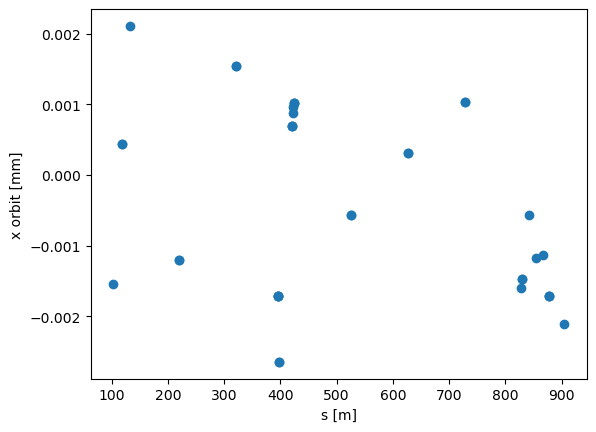

In [21]:
fig, ax = plt.subplots()

ax.scatter(
    [ eleDict["s"] for eleDict in selectedMarkerDicts ],
    [ np.median(getBeamAtElement(tao, eleDict["eleII"]).x) for eleDict in selectedMarkerDicts ]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("x orbit [mm]")
plt.show()


### Steered

In [22]:
resultX = xSolver(tao)

print("Optimization Results:")
print(f"Optimal Parameters: {resultX.x}")
print(f"Objective Function Value at Optimal Parameters: {resultX.fun}")
print(f"Number of Iterations: {resultX.nit}")
print(f"Converged: {resultX.success}")

xSetter(tao, resultX.x)

Optimization Results:
Optimal Parameters: [-1.08127814e-02  1.29394657e-02  4.37566282e-04 -1.20619257e-03
 -1.28133850e-04  2.60382310e-03 -1.84959446e-03  8.38427602e-04
 -1.14308986e-05 -1.15777955e-03 -2.88000561e-04  2.15928805e-04
  1.05815473e-03 -1.04598057e-03 -4.15976764e-05 -5.88779502e-04
  5.33004403e-04 -1.09810834e-04 -7.75806053e-04 -6.68876360e-04
  2.82726805e-03 -3.52646011e-03  2.17135599e-04  1.07582170e-03
  1.09184210e-03 -3.24396627e-04 -1.24748191e-03  7.52582004e-04
  1.71611920e-03 -1.43840686e-03 -1.93238965e-03  2.30781411e-03
  2.10261073e-04 -1.36824816e-03 -3.04825699e-05  1.08923593e-03
  4.37908067e-04 -2.20848077e-04 -5.52223059e-04  7.69402738e-04
 -2.05015175e-03 -5.86606331e-04  2.85108315e-04  2.87992114e-04
  1.51752454e-05 -8.85132477e-05 -1.47609315e-05 -8.88541853e-05
 -1.37644876e-03  4.22442193e-04  5.29312479e-03  1.70442102e-04
 -6.22856600e-04 -2.09211329e-04 -3.28988403e-04  1.87655822e-03
  4.27094202e-03 -1.35523621e-03 -1.21860360e-02

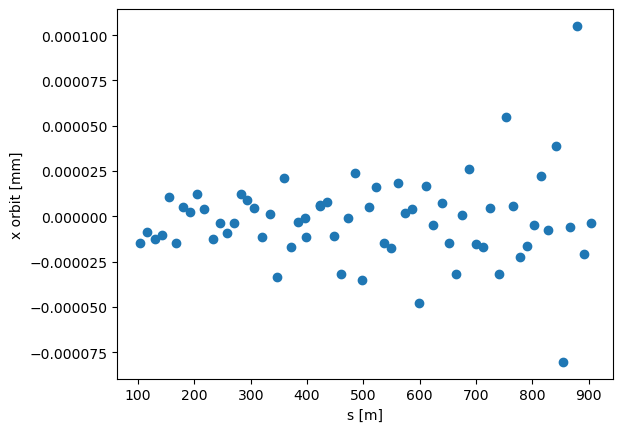

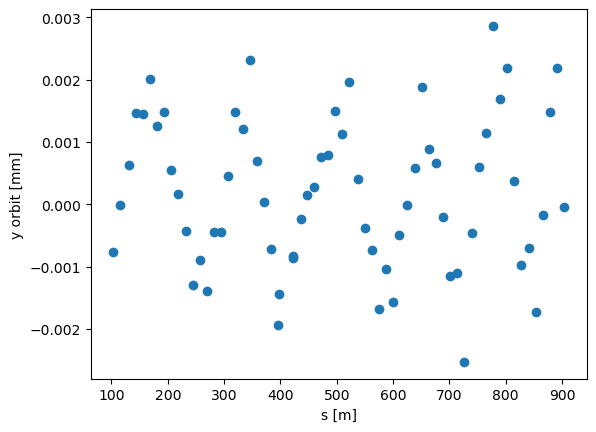

In [23]:
fig, ax = plt.subplots()
# ax.scatter(
#     [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
#     [ tao.ele_orbit(eleII)["x"] for eleII in range(totalNumElements) ]
# )
ax.scatter(
    [ tao.ele_head(ele)["s"] for ele in allBPMNames ],
    #[ tao.ele_orbit(ele)["x"] for ele in allBPMNames ]
    [tao.ele_orbit(ele)["x"] - (tao.ele_floor(ele)["Actual"][0] - tao.ele_floor(ele)["Reference"][0]) for ele in allBPMNames]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("x orbit [mm]")
plt.show()


fig, ax = plt.subplots()
# ax.scatter(
#     [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
#     [ tao.ele_orbit(eleII)["y"] for eleII in range(totalNumElements) ]
# )
ax.scatter(
    [ tao.ele_head(ele)["s"] for ele in allBPMNames ],
    #[ tao.ele_orbit(ele)["y"] for ele in allBPMNames ]
    [tao.ele_orbit(ele)["y"] - (tao.ele_floor(ele)["Actual"][1] - tao.ele_floor(ele)["Reference"][1]) for ele in allBPMNames]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("y orbit [mm]")
plt.show()

In [24]:
resultY = ySolver(tao)

print("Optimization Results:")
print(f"Optimal Parameters: {resultY.x}")
print(f"Objective Function Value at Optimal Parameters: {resultY.fun}")
print(f"Number of Iterations: {resultY.nit}")
print(f"Converged: {resultY.success}")

ySetter(tao, resultY.x)

Optimization Results:
Optimal Parameters: [-1.78221867e-03  5.94266349e-03 -8.64105962e-04 -1.91104928e-03
  1.53359834e-03 -8.99794441e-04  2.57371485e-04 -5.25754120e-04
 -3.33022120e-04  1.72335284e-03  1.52926614e-05 -2.40584875e-03
  2.22608746e-03 -3.25850543e-03  6.76820557e-03 -1.25655426e-02
  9.66587125e-03 -5.04089564e-03  1.29489077e-03  8.65794604e-04
 -3.21886403e-03  2.33652251e-03  1.75988335e-04 -2.76604775e-03
  2.73261200e-03 -4.45418706e-04 -4.22251175e-03  2.51895272e-03
 -9.29447005e-04  1.13177511e-03 -9.45799318e-04  1.52124272e-03
  2.75081322e-03  4.68409168e-04 -1.44079537e-04  1.97824049e-04
 -7.74020737e-04  2.44081148e-03 -1.18773177e-03 -1.93327675e-03
 -4.70894929e-04 -5.85142869e-04  1.27392483e-03  2.21838510e-03
 -5.98460954e-03 -1.64649037e-03  5.20062213e-03  9.25822549e-04
 -1.01417297e-02 -3.35604664e-03  1.06065594e-02  5.16792652e-04
  1.72004209e-03  8.14560185e-04 -4.91930298e-04 -9.90857348e-04
 -9.60506256e-04  3.21640413e-03  9.79653240e-03

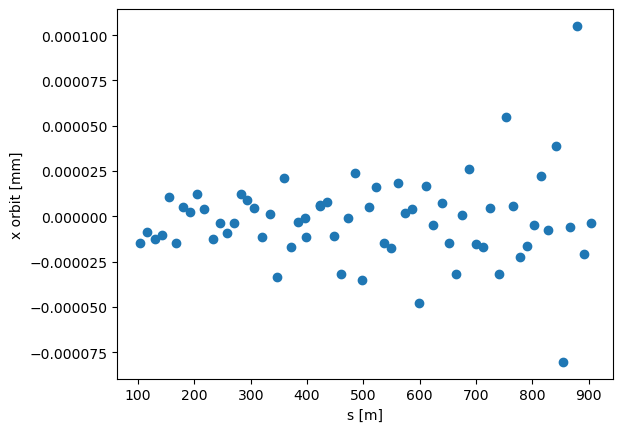

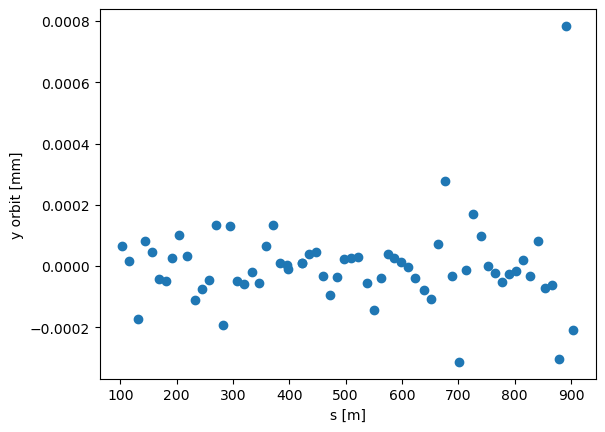

In [25]:
fig, ax = plt.subplots()
# ax.scatter(
#     [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
#     [ tao.ele_orbit(eleII)["x"] for eleII in range(totalNumElements) ]
# )
ax.scatter(
    [ tao.ele_head(ele)["s"] for ele in allBPMNames ],
    #[ tao.ele_orbit(ele)["x"] for ele in allBPMNames ]
    [tao.ele_orbit(ele)["x"] - (tao.ele_floor(ele)["Actual"][0] - tao.ele_floor(ele)["Reference"][0]) for ele in allBPMNames]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("x orbit [mm]")
plt.show()


fig, ax = plt.subplots()
# ax.scatter(
#     [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
#     [ tao.ele_orbit(eleII)["y"] for eleII in range(totalNumElements) ]
# )
ax.scatter(
    [ tao.ele_head(ele)["s"] for ele in allBPMNames ],
    #[ tao.ele_orbit(ele)["y"] for ele in allBPMNames ]
    [tao.ele_orbit(ele)["y"] - (tao.ele_floor(ele)["Actual"][1] - tao.ele_floor(ele)["Reference"][1]) for ele in allBPMNames]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("y orbit [mm]")
plt.show()

In [26]:
trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

activeData = {}
for activeEle in  [ "PR10571", "WS12214", "BEGBC14_1", "ENDBC14_2", "BEGBC20" ]:
    # print(activeEle)
    # print(f"""{getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6:.2f}, {getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6:.2f}""")
    # print()
    activeData[f"{activeEle}_x"] = getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6
    activeData[f"{activeEle}_y"] = getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6

printableData = { key : f"""{activeData[key]:.2f}""" for key in activeData.keys() }

print(tabulate([
    ["PR10571",                  printableData["PR10571_x"], printableData["PR10571_y"]], 
    ["WS12214",                  printableData["WS12214_x"], printableData["WS12214_y"]],
    ["BEGBC14",                  printableData["BEGBC14_1_x"], printableData["BEGBC14_1_y"]],
    ["ENDBC14",                  printableData["ENDBC14_2_x"], printableData["ENDBC14_2_y"]],
    ["BEGBC20\n(L3 wire proxy)", printableData["BEGBC20_x"], printableData["BEGBC20_y"]]
], 
["90% RMS\nemittance (not\nSI90!) [um-rad]", "\n     X     ", "\n     Y     "], 
tablefmt="grid"))

Loaded /tmp/beams/activeBeamFile_261521847100542641.h5
Set track_start = L0AFEND, track_end = BEGBC20
Set track_end = ENDDL10
Tracking!
Beam centered at ENDDL10 written to /tmp/beams/patchBeamFile_261521847100542641.h5
Loaded /tmp/beams/patchBeamFile_261521847100542641.h5
Set track_start = ENDDL10, track_end = BEGBC20
Tracking!
trackBeam() exiting
+-------------------+---------------+---------------+
| 90% RMS           |               |               |
| emittance (not    |        X      |        Y      |
| SI90!) [um-rad]   |               |               |
+===================+===============+===============+
| PR10571           |          3.9  |          2.86 |
+-------------------+---------------+---------------+
| WS12214           |         11.11 |          7.59 |
+-------------------+---------------+---------------+
| BEGBC14           |         30.27 |          6.47 |
+-------------------+---------------+---------------+
| ENDBC14           |         27.05 |          8.26 |
+-

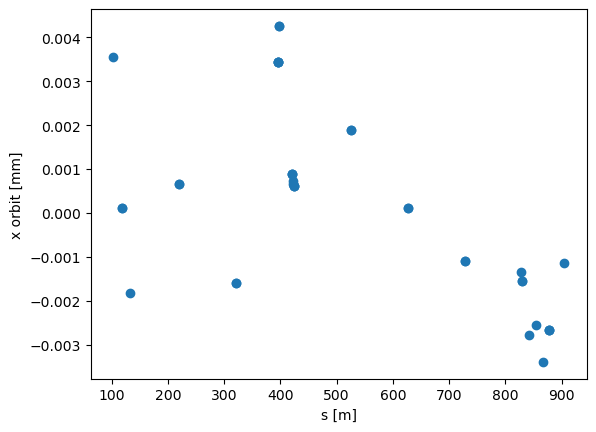

In [27]:
fig, ax = plt.subplots()

ax.scatter(
    [ eleDict["s"] for eleDict in selectedMarkerDicts ],
    [ np.median(getBeamAtElement(tao, eleDict["eleII"]).x) for eleDict in selectedMarkerDicts ]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("x orbit [mm]")
plt.show()
